# Equipo 2

- De Luna Ocampo Yanina

- Elizalde Baez Regina

- Sainz Takata Juan Pablo Minoru

- Salinas Velázquez Jacob

- Vázquez Portuguez José Antonio 

# Analítica Avanzada de Datos. - Práctica 1
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

### Librerías y cargar data set

In [1]:
# cargar libreria pandas
import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv('flights.csv')

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips: 
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos 
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

# Limpieza de datos

In [2]:
#escribe tu código aqui

# Datos nulos o vacios y reemplazarlos por la media
df.isnull().sum()
df.fillna('mean')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


# Explora los datos limpios

In [3]:
# Visualizar con countplot() para ver la distribución de ambas columnas
import seaborn as sns

sns.countplot(x='ArrDelay', data=df)


<AxesSubplot: xlabel='ArrDelay', ylabel='count'>

In [4]:
sns.countplot(x='DepDelay', data=df)

<AxesSubplot: xlabel='DepDelay', ylabel='count'>

In [5]:
# Eliminar outliers
ArrDelay_01pcntile = df['ArrDelay'].quantile(0.01)
ArrDelay_90pcntile = df['ArrDelay'].quantile(0.90)
df = df[df.ArrDelay < ArrDelay_90pcntile]
df = df[df.ArrDelay > ArrDelay_01pcntile]

DepDelay_01pcntile = df['DepDelay'].quantile(0.01)
DepDelay_90pcntile = df['DepDelay'].quantile(0.90)
df = df[df.DepDelay < DepDelay_90pcntile]
df = df[df.DepDelay > DepDelay_01pcntile]

In [6]:
# Average(mean) para departure delay
print("La media es DepDelay: ", df['DepDelay'].mean())
print("La media ArrDelay es: ", df['ArrDelay'].mean())


La media es DepDelay:  -0.9216920012873314
La media ArrDelay es:  -5.030275610199769


In [7]:
#      - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,211636.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018352,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.134222,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


/tmp/ipykernel_525/1762220080.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DepDelay'])
/tmp/ipykernel_525/1762220080.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ArrDelay'])


<AxesSubplot: xlabel='ArrDelay', ylabel='Density'>

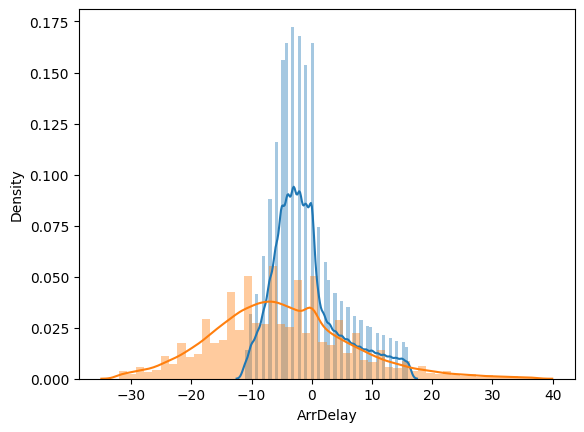

In [8]:
#     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
sns.distplot(df['DepDelay'])
sns.distplot(df['ArrDelay'])

# Preguntas

### 1. ¿Cuáles son los promedios (mean) de salida y llegada?

In [9]:
df.groupby('Carrier')['DepDelay'].mean().sort_values(ascending=False)

Carrier
WN    1.892396
UA   -0.338885
FL   -0.385143
F9   -0.512635
AA   -0.850789
VX   -0.926741
DL   -1.575584
MQ   -1.730151
EV   -2.312638
B6   -2.357754
US   -2.424986
YV   -2.440316
OO   -2.525729
9E   -2.852246
HA   -2.960716
AS   -3.078139
Name: DepDelay, dtype: float64

In [10]:
df.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

Carrier
F9   -0.502527
HA   -2.285384
WN   -2.884136
AS   -3.583845
YV   -3.818073
US   -3.911790
FL   -3.954649
OO   -4.289238
MQ   -4.303297
VX   -5.303501
B6   -5.810046
AA   -5.879219
DL   -6.611133
EV   -6.813485
9E   -7.496322
UA   -7.606653
Name: ArrDelay, dtype: float64

### 2. ¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?

In [12]:
# - *¿Hay días de la semana más propensos a las llegadas que otros?*
df.groupby('DayOfWeek')['ArrDelay'].mean().sort_values(ascending=False)

DayOfWeek
4   -3.954965
5   -4.448380
3   -4.750124
1   -4.918798
7   -5.509348
2   -5.571680
6   -6.244790
Name: ArrDelay, dtype: float64

In [11]:
# - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
df.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)

OriginAirportName
Chicago Midway International           2.365960
Dallas Love Field                      2.148798
William P Hobby                        1.561927
Metropolitan Oakland International     0.964853
Denver International                   0.807272
                                         ...   
Memphis International                 -2.962737
Tucson International                  -2.989154
Ted Stevens Anchorage International   -3.149758
Richmond International                -3.198073
Long Beach Airport                    -3.447844
Name: DepDelay, Length: 70, dtype: float64

In [13]:
# - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
df.groupby('DepDelay')['ArrDelay'].mean().sort_values(ascending=False)

DepDelay
 16    10.182327
 15     9.028626
 14     8.299118
 13     7.101961
 12     6.632258
 11     5.663978
 10     4.595694
 9      3.875166
 8      3.198494
 7      1.926932
 6      1.312100
 5     -0.217332
 4     -0.838296
 3     -1.647143
 2     -2.564987
 1     -3.460716
 0     -3.499264
-1     -5.411742
-2     -6.364184
-3     -7.229764
-4     -8.028318
-5     -8.853289
-6     -9.360354
-7    -10.048102
-8    -10.777778
-9    -11.391694
-10   -12.328793
-11   -13.009085
Name: ArrDelay, dtype: float64

### 3. ¿Hay días de la semana más propensos a las llegadas que otros?

In [14]:
df['DayOfWeek'].value_counts()

2    32366
3    32344
1    32253
5    30715
4    30643
7    30115
6    25961
Name: DayOfWeek, dtype: int64

In [15]:
print("La moda de DayOfWeek es: ", df['DayOfWeek'].mode())

La moda de DayOfWeek es:  0    2
dtype: int64


### 4. ¿Cuál es el aeropuerto de salida con mayor retraso medio?

In [16]:
df.groupby('OriginAirportName')['ArrDelay'].mean().sort_values(ascending=False)

OriginAirportName
Dallas Love Field                    -0.821313
Kahului Airport                      -2.389113
Metropolitan Oakland International   -2.489649
William P Hobby                      -2.552752
Chicago Midway International         -2.627360
                                        ...   
Theodore Francis Green State         -7.046036
LaGuardia                            -7.215417
Richmond International               -7.263383
John F. Kennedy International        -7.848299
Newark Liberty International         -8.187746
Name: ArrDelay, Length: 70, dtype: float64

### 5. ¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales

In [17]:
df[df['DepDelay'] < 0]['ArrDelay'].mean()

-8.159915833771699

In [18]:
df[df['DepDelay'] >= 0]['ArrDelay'].mean()

0.28801651852038374

El retraso de la llegada cuando el avión sale a tiempo o antes este se retrasa en media 0.28 minutos antes y cuando sale a destiempo se tarda más en llegar 8 minutos tarde

### 6. ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?

In [19]:
departure_airport_group = df.groupby(df['OriginAirportName'])

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


### 7. ¿Qué ruta tiene el mayor retraso medio de llegada?

In [20]:
rutas = pd.Series(df['OriginAirportName'] + ' > ' + df['DestAirportName'])
data1 = pd.concat([df, rutas.rename("Ruta")], axis=1)
ruta_grupo = data1.groupby(data1.Ruta)
pd.DataFrame(ruta_grupo['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Ruta,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667


In [21]:
ruta_grupo = data1.groupby(data1.Ruta)
pd.DataFrame(ruta_grupo['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Ruta,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7b37c19-ce3e-4493-aeb7-511546583f4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>